## Step1 - Reading and Understanding the data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
day = pd.read_csv("day.csv")
pd.set_option('display.max_columns', None) # to view all the columns

In [3]:
# Reading the dataset
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the number of rows and columns of the dataset
day.shape

(730, 16)

In [5]:
#Checking the datatype and null values of the columns
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Observation: 
There are no missing values in this dataset

In [6]:
#Checking the numerical variables summary
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Converting 'dteday' column to pandas dataframe in order to extract day
day['dteday'] = pd.to_datetime(day['dteday'])

#Extracting date from the 'dteday' column
day['Day_of_the_month'] = pd.DatetimeIndex(day['dteday']).day

In [8]:
#Dropping few columns below as they are not required.
day.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Day_of_the_month
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,1
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,1
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,1


###### Comment:
In the above code, columns have been dropped due to the following reasons:
- Instant- This column gives index for the dataset which is not needed
- Casual and registered have been added and this information contains in a seperate column 'cnt' 
- dteday : day_of_the_month has been extracted. Since month and year variables are already present, this column has been dropped

## Step 2 - Visualising the data

###### Comment: 
- Pairplot on the entire dataset isn't giving the best view hence plotting continous and categorical seperately"

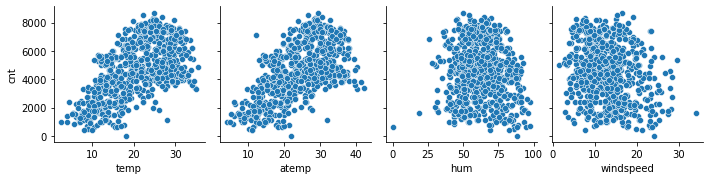

In [9]:
#Plotting all the continous variables against the target varible 'cnt'
sns.pairplot(data = day, kind = 'scatter', x_vars = ['temp','atemp','hum','windspeed'], y_vars = ['cnt'], diag_kind = None)
plt.show()


#### Observation

-  From the above graph, we can see a linear trend for **temp** and **atemp** variables

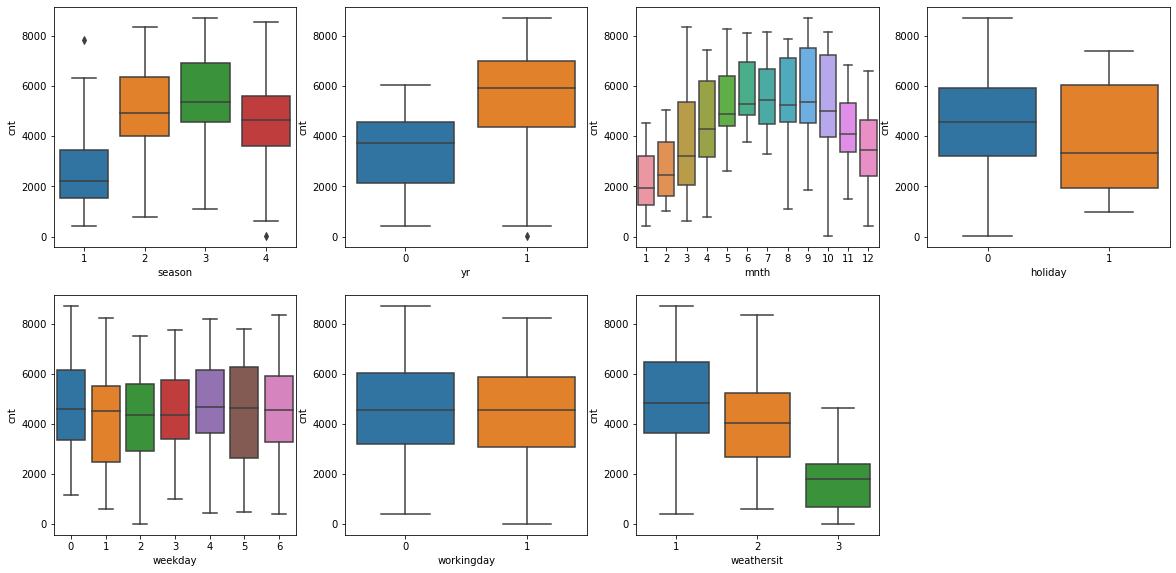

In [10]:
## Visualising some categorical variables
plt.figure(figsize = (20,15))
plt.subplot(3,4,1)
sns.boxplot(x = 'season' , y = 'cnt' , data = day)
plt.subplot(3,4,2)
sns.boxplot(x = 'yr' , y = 'cnt', data = day)
plt.subplot(3,4,3)
sns.boxplot(x = 'mnth' , y = 'cnt', data = day)
plt.subplot(3,4,4)
sns.boxplot(x = 'holiday' , y = 'cnt', data = day)
plt.subplot(3,4,5)
sns.boxplot(x = 'weekday' , y = 'cnt', data = day)
plt.subplot(3,4,6)
sns.boxplot(x = 'workingday' , y = 'cnt', data = day)
plt.subplot(3,4,7)
sns.boxplot(x = 'weathersit' , y = 'cnt', data = day);

##### Few Observations

 - The product is mostly used during **Summer** and **Fall**
 - The product has acquired more demand in the year **2019** compared to 2018
 - The bike sharing has been used more on the days 
     - when there are no holidays
     - when the sky was either Clear or Few clouds or Partly cloudy

#### Outliers:
- From the above plots, we can visualise couple of outliers which are not going to affect our analysis. Hence leaving them untreated

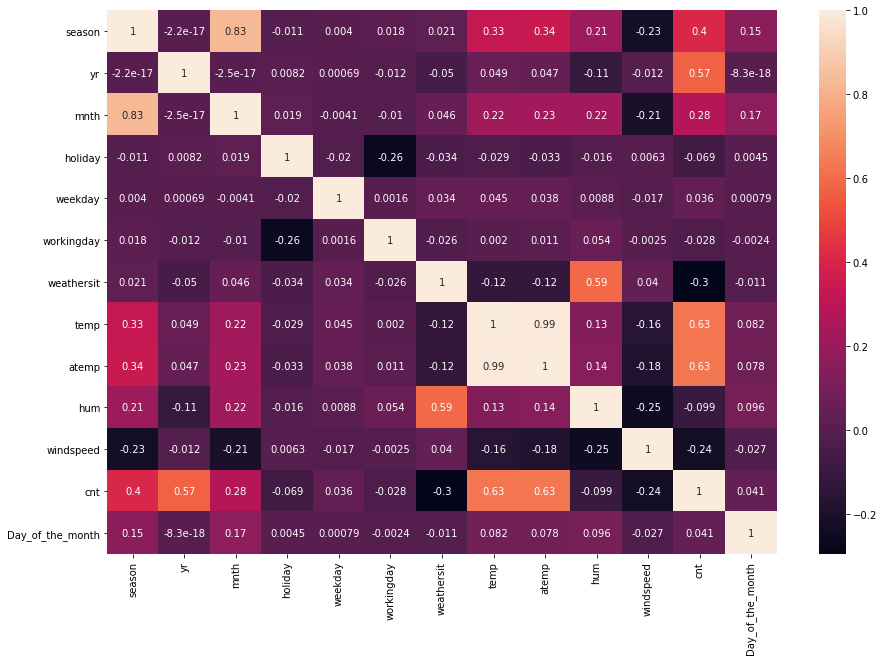

In [11]:
# Correlation between variables
plt.figure(figsize = (15,10))
sns.heatmap(day.corr(), annot = True );

#### Observation

-  **temp** and **atemp** are very strongly correlated.
-  **cnt** is strongly correlated with **yr** , **temp** and **atemp**
- **mnth** and **season** are strongly correlated

## Step3 - Data Preparation

##### Replacing  numerical variables in the category column

In [12]:
day['season'] = day['season'].replace([1,2,3,4],['Spring','Summer','Fall','Winter'])

In [13]:
day.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [14]:
#Checking the values of weather
day.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [15]:
day['weathersit'] = day['weathersit'].replace([1,2,3],['Clearsky','Mist + Cloudy','Light Rain/Snow'])

In [16]:
day.weathersit.value_counts()

Clearsky           463
Mist + Cloudy      246
Light Rain/Snow     21
Name: weathersit, dtype: int64

###### Observation:  
- Data for 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog is **not Present** as mentioned in the data dictionary

In [17]:
day['mnth'] = day['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May','June','July','August','September','October','November','December'])

In [18]:
day.mnth.value_counts()

January      62
December     62
October      62
May          62
March        62
August       62
July         62
September    60
November     60
June         60
April        60
February     56
Name: mnth, dtype: int64

In [19]:
day.weekday = day.weekday.replace([0,1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
day.weekday.value_counts()

Tuesday      105
Monday       105
Sunday       104
Wednesday    104
Friday       104
Thursday     104
Saturday     104
Name: weekday, dtype: int64

#### Dummy variables
- Categorical variables 'season','weekday','month' and 'weathersit' are numerically represented as 1,2,3,4 which dont really have any order associated with it. Hence we need to create dummy variables

In [20]:
pd.set_option('display.max_rows',None)

In [21]:
#Creating dummy variables for season
season = pd.get_dummies(day['season'],drop_first=True)
season

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [22]:
#Creating dummy variables for weather
weather = pd.get_dummies(day['weathersit'], drop_first=True)
weather

,Light Rain/Snow,Mist + Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,1
7,0,1
8,0,0
9,0,0


In [23]:
#Creating dummy variables for month
month = pd.get_dummies(day['mnth'], drop_first=True)
month

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0


In [24]:
##Creating dummy variables for weekday
weekday = pd.get_dummies(day['weekday'],drop_first=True)
weekday

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0
5,0,1,0,0,0,0
6,0,0,1,0,0,0
7,1,0,0,0,0,0
8,0,0,0,0,1,0
9,0,0,0,0,0,1


In [25]:
# Adding all the dummies to the main dataframe by using 'concat'
day = pd.concat([day,season, weather,month,weekday], axis=1)

In [26]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Day_of_the_month,Spring,Summer,Winter,Light Rain/Snow,Mist + Cloudy,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Spring,0,January,0,Monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Spring,0,January,0,Tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Spring,0,January,0,Wednesday,1,Clearsky,8.050924,9.47025,43.7273,16.636703,1349,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Spring,0,January,0,Thursday,1,Clearsky,8.200000,10.60610,59.0435,10.739832,1562,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Spring,0,January,0,Friday,1,Clearsky,9.305237,11.46350,43.6957,12.522300,1600,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
#Dropping the columns season, weathersit, month an weekday

day.drop(['season','weathersit','mnth','weekday'], axis = 1, inplace=True)

In [28]:
#Verifying after dropping the varibles
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Day_of_the_month,Spring,Summer,Winter,Light Rain/Snow,Mist + Cloudy,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# After creating dummies, verifying the dtype for the columns
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   atemp             730 non-null    float64
 5   hum               730 non-null    float64
 6   windspeed         730 non-null    float64
 7   cnt               730 non-null    int64  
 8   Day_of_the_month  730 non-null    int64  
 9   Spring            730 non-null    uint8  
 10  Summer            730 non-null    uint8  
 11  Winter            730 non-null    uint8  
 12  Light Rain/Snow   730 non-null    uint8  
 13  Mist + Cloudy     730 non-null    uint8  
 14  August            730 non-null    uint8  
 15  December          730 non-null    uint8  
 16  February          730 non-null    uint8  
 1

In [30]:
#Typecasting all columns with uint8 to int32
day.iloc[9:] = day.iloc[9:].astype(int)

In [31]:
#Verifying the changes after typecasting
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   atemp             730 non-null    float64
 5   hum               730 non-null    float64
 6   windspeed         730 non-null    float64
 7   cnt               730 non-null    int64  
 8   Day_of_the_month  730 non-null    int64  
 9   Spring            730 non-null    int32  
 10  Summer            730 non-null    int32  
 11  Winter            730 non-null    int32  
 12  Light Rain/Snow   730 non-null    int32  
 13  Mist + Cloudy     730 non-null    int32  
 14  August            730 non-null    int32  
 15  December          730 non-null    int32  
 16  February          730 non-null    int32  
 1

## Step 4: Splitting the data into Training and Testing sets

In [32]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
day_train,day_test = train_test_split(day, train_size = 0.7, random_state = 100)

In [33]:
day_train.shape

(510, 31)

In [34]:
day_test.shape

(220, 31)

#### Rescaling the features

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
Scaler = MinMaxScaler()

In [37]:
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Day_of_the_month,Spring,Summer,Winter,Light Rain/Snow,Mist + Cloudy,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# Applying scaler() to all columns expect for columns having binary values and dummy variables
num_vars = ['temp','atemp','hum','windspeed','cnt','Day_of_the_month']

day_train[num_vars] = Scaler.fit_transform(day_train[num_vars])

In [39]:
# checking for scaling
day_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Day_of_the_month,Spring,Summer,Winter,Light Rain/Snow,Mist + Cloudy,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.533764,0.512410,0.645933,0.323161,0.513499,0.487712,0.243137,0.247059,0.247059,0.029412,0.345098,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.224874,0.207451,0.145799,0.165619,0.224421,0.295091,0.429398,0.431725,0.431725,0.169124,0.475867,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333333,0.333333,0.536082,0.218750,0.356420,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545455,0.538462,0.649485,0.312500,0.518638,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727273,0.692308,0.752577,0.406250,0.684710,0.733333,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


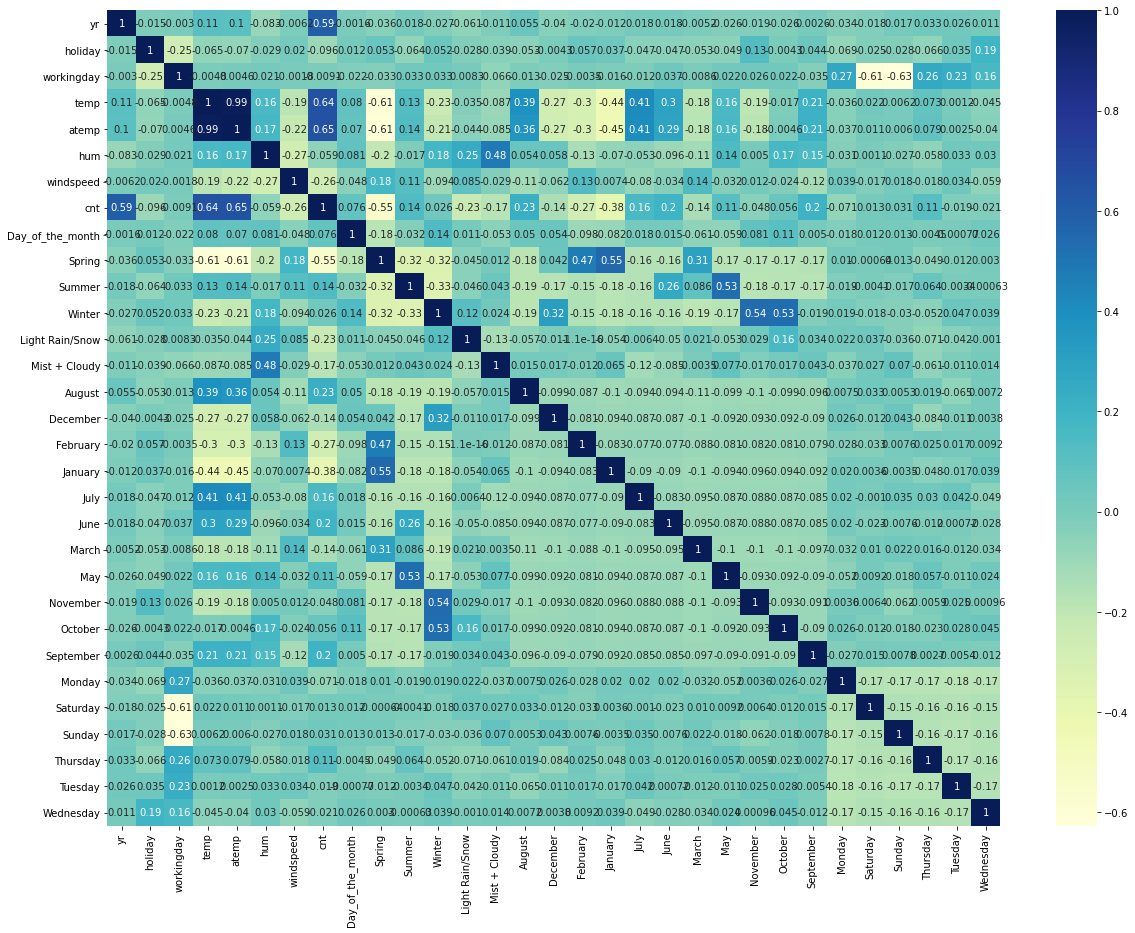

In [40]:
#Checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20,15))
sns.heatmap(day_train.corr(), annot = True, cmap = 'YlGnBu');

##### Observation:
- Temp variable is strongly correlated with CNT. 

##### Next step
- Lets build a model between these two varaibles and fit a regression line

#### Dividing into X and Y sets for model building

In [41]:
y_train = day_train.pop('cnt')
X_train = day_train

## Step 5 - Building a linear model

Building model with **temp** variable which is highly correlated with **cnt**

In [42]:
#Import statsmodel
import statsmodels.api as sm

#Adding a constant
X_train_lm = sm.add_constant(X_train[['temp']])

#Create a first fitted model
lr = sm.OLS(y_train,X_train_lm).fit()

In [43]:
#Checking for parameters
lr.params

const    0.170123
temp     0.643311
dtype: float64

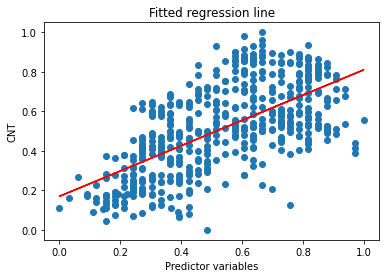

In [44]:
#### Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.xlabel("Predictor variables")
plt.ylabel("CNT")
plt.title("Fitted regression line")
plt.plot(X_train_lm.iloc[:,1], 0.17+0.64*X_train_lm.iloc[:,1], 'r');

##### Adding all variables

In [45]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Day_of_the_month', 'Spring', 'Summer', 'Winter', 'Light Rain/Snow',
       'Mist + Cloudy', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [46]:
#Adding a constant 
X_train_sm = sm.add_constant(X_train)

## Creating a first fitted model
lr = sm.OLS(y_train, X_train_sm).fit()

In [47]:
lr.params

const               0.400611
yr                  0.230970
holiday            -0.136088
workingday         -0.063175
temp                0.353294
atemp               0.087967
hum                -0.156471
windspeed          -0.181588
Day_of_the_month   -0.005114
Spring             -0.044802
Summer              0.043218
Winter              0.108546
Light Rain/Snow    -0.250608
Mist + Cloudy      -0.058446
August              0.029464
December           -0.043581
February           -0.037926
January            -0.065213
July               -0.026226
June                0.011445
March               0.002279
May                 0.025891
November           -0.038720
October             0.006644
September           0.091444
Monday             -0.024714
Saturday           -0.057296
Sunday             -0.052227
Thursday            0.004840
Tuesday            -0.026755
Wednesday          -0.009972
dtype: float64

In [48]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     90.44
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.93e-176
Time:                        11:34:49   Log-Likelihood:                 522.57
No. Observations:                 510   AIC:                            -983.1
Df Residuals:                     479   BIC:                            -851.9
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4006      0.085  

###### Observation:
There are lot of variables with high p-values

###### Next step:
I'll go ahead and select variables using RFE and find the best possible model

### Model selection using RFE

In [49]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
#Running RFE with output number of variables equal to 15
lm =  LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [51]:
#Listing variables and their ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Day_of_the_month', False, 14),
 ('Spring', True, 1),
 ('Summer', False, 3),
 ('Winter', True, 1),
 ('Light Rain/Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('August', False, 10),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('March', False, 16),
 ('May', False, 9),
 ('November', True, 1),
 ('October', False, 13),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 15),
 ('Tuesday', False, 7),
 ('Wednesday', False, 11)]

In [52]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Light Rain/Snow', 'Mist + Cloudy', 'December', 'January',
       'July', 'November', 'September'],
      dtype='object')

In [53]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Day_of_the_month', 'Summer', 'August', 'February',
       'June', 'March', 'May', 'October', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

#### Building Model1 using statsmodels

In [54]:
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [55]:
#Add a constant 
X_train_sm = sm.add_constant(X_train_rfe)

#Build a first fitted model
lr1 = sm.OLS(y_train,X_train_sm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     175.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.02e-187
Time:                        11:34:50   Log-Likelihood:                 509.91
No. Observations:                 510   AIC:                            -987.8
Df Residuals:                     494   BIC:                            -920.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3677      0.032     

###### Observation:
- High p-value for **atemp**. Hence dropping the variable and will build a model again

In [56]:
# Checking for the VIF values of the indepedent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[-1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,atemp,320.15
2,temp,311.26
4,hum,25.30
5,windspeed,4.26
7,Winter,3.01
6,Spring,2.95
9,Mist + Cloudy,2.28
0,yr,2.07
13,November,1.84
11,January,1.74


##### Dropping atemp and building model 2

In [57]:
X_train_new1 = X_train_rfe.drop(['atemp'], axis = 1)

In [58]:
#Add a constant
X_train_sm = sm.add_constant(X_train_new1)

#Build second fitted model
lr2 = sm.OLS(y_train,X_train_sm).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          6.09e-188
Time:                        11:34:50   Log-Likelihood:                 509.36
No. Observations:                 510   AIC:                            -988.7
Df Residuals:                     495   BIC:                            -925.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3726      0.032     

In [59]:
# Checking VIF as December and November have same p-values
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,24.38
2,temp,16.71
4,windspeed,4.22
6,Winter,2.98
5,Spring,2.94
8,Mist + Cloudy,2.26
0,yr,2.07
12,November,1.84
10,January,1.74
9,December,1.55


###### Dropping November which has relatively high p-value and building model 3

In [60]:
X_train_new2 = X.drop(['November'], axis=1)

In [61]:
#Adding a constant

X_train_sm = sm.add_constant(X_train_new2)

#Build a third fitted model
lr3 = sm.OLS(y_train,X_train_sm).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          9.85e-188
Time:                        11:34:50   Log-Likelihood:                 506.10
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     496   BIC:                            -924.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3604      0.032     

##### Dropping December which has  high p-value and building model 4

In [62]:
# droppng December which has p-value greater than 0.05
X_train_new3 = X_train_new2.drop(['December'], axis = 1)

In [63]:
# Adding a constant

X_train_sm = sm.add_constant(X_train_new3)

#Build a fourth fitted model
lr4 = sm.OLS(y_train,X_train_sm).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.73e-188
Time:                        11:34:50   Log-Likelihood:                 504.63
No. Observations:                 510   AIC:                            -983.3
Df Residuals:                     497   BIC:                            -928.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3545      0.032     

In [64]:
# Checking VIF for multicollinearity
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,23.07
2,temp,15.79
4,windspeed,4.17
5,Spring,2.90
8,Mist + Cloudy,2.24
6,Winter,2.10
0,yr,2.07
9,January,1.66
10,July,1.40
7,Light Rain/Snow,1.21


##### Dropping January  and building model 5

In [65]:
X_train_new4 = X_train_new3.drop(['January'], axis = 1)

In [66]:
#Add a constant
X_train_sm = sm.add_constant(X_train_new4)

#Build a fifth fitted model
lr5 = sm.OLS(y_train,X_train_sm).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     232.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.54e-188
Time:                        11:34:50   Log-Likelihood:                 501.87
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     498   BIC:                            -928.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3442      0.031     

In [67]:
#Checking VIF for multicolinearity
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif


,Features,VIF
3,hum,22.22
2,temp,15.18
4,windspeed,4.16
5,Spring,2.54
8,Mist + Cloudy,2.23
6,Winter,2.08
0,yr,2.06
9,July,1.40
7,Light Rain/Snow,1.21
10,September,1.20


##### Comment 
-  All p-values are 0 and VIF's for humidity and temp is high

##### Dropping humidity and building model 6

In [68]:
# Dropping hum as it has high VIF

X_train_new5 = X_train_new4.drop(['hum'], axis = 1)

In [69]:
#Add a constant
X_train_sm = sm.add_constant(X_train_new5)

# Build a sixth fitted model
lr6 = sm.OLS(y_train,X_train_sm).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          9.39e-186
Time:                        11:34:50   Log-Likelihood:                 492.94
No. Observations:                 510   AIC:                            -963.9
Df Residuals:                     499   BIC:                            -917.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2576      0.024     

In [70]:
# Calculating VIF

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif


,Features,VIF
2,temp,4.69
3,windspeed,4.14
0,yr,2.06
4,Spring,1.66
7,Mist + Cloudy,1.52
5,Winter,1.39
8,July,1.35
9,September,1.20
6,Light Rain/Snow,1.08
1,holiday,1.04


#### Comment:

- All p-values are within 0.05 which indicates they are significant
- All VIF's are within 5
- R2 is 83% and Adjusted R2 is 82%
- F-statistic and prob(F-stat) are also as expected


##### Next step:

-  After testing this model on test set, R2 score was 79. Hence dropping the variable which has high VIF.
- In this case, temperature is an important variable and cannot be dropped. So, I will go ahead and drop next variable which has high VIF i.e, Windspeed

In [71]:
# Dropping windspeed

X_train_new6 = X_train_new5.drop(['windspeed'], axis = 1)

In [72]:
#Add a constant
X_train_sm = sm.add_constant(X_train_new6)

# Build a seventh fitted model
lr7 = sm.OLS(y_train,X_train_sm).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.09e-180
Time:                        11:34:50   Log-Likelihood:                 478.10
No. Observations:                 510   AIC:                            -936.2
Df Residuals:                     500   BIC:                            -893.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1980      0.022     

In [73]:
# Calculating VIF

vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,2.99
0,yr,2.05
6,Mist + Cloudy,1.51
4,Winter,1.33
7,July,1.33
3,Spring,1.25
8,September,1.19
5,Light Rain/Snow,1.06
1,holiday,1.04


##### Observation:
- All predictor variables have p-value almost 0
- VIF's for all predictor variables are < 3
- R2 is 82% and Adjusted R2 is 81%


##### Next step:
- This is the best fitted model I could get. Hence proceeding with residual analysis

## Step6 : Residual Analysis of the train data 

In [74]:
y_train_cnt = lr7.predict(X_train_sm)

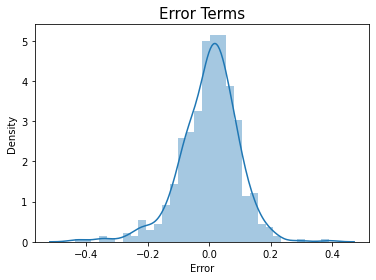

In [75]:
# Plot distplot of the error terms
sns.distplot(y_train - y_train_cnt)
plt.xlabel("Error")
plt.ylabel("Density")
plt.title("Error Terms", fontsize = 15)
plt.show()


###### Inference:
Error terms are normally distributed and is centered around zero which is one of the assumptions of linear regression

## Step 7 : Making predictions Using the Final Model

In [76]:
#scaling on test set
num_vars = ['temp','atemp','hum','windspeed','cnt','Day_of_the_month']

day_test[num_vars] = Scaler.fit_transform(day_test[num_vars])

In [77]:
day_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Day_of_the_month,Spring,Summer,Winter,Light Rain/Snow,Mist + Cloudy,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.557361,0.534472,0.506442,0.427052,0.517923,0.497576,0.254545,0.263636,0.236364,0.027273,0.318182,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,0.247723,0.223933,0.200292,0.190618,0.239498,0.290024,0.436599,0.441609,0.425817,0.163248,0.466833,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354839,0.351351,0.357639,0.307692,0.361045,0.266667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.548387,0.540541,0.486111,0.423077,0.520681,0.483333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.774194,0.729730,0.652778,0.538462,0.687956,0.766667,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Dividing into X_test and y_test

In [78]:
y_test = day_test.pop('cnt')
X_test = day_test

In [79]:
#Adding a constant variable on test dataframe
X_test_sm = sm.add_constant(X_test)

# Creating a dataframe by dropping variables from X_test
X_test_sm = X_test_sm.drop(['workingday', 'Day_of_the_month', 'Summer', 'August', 'February',
       'June', 'March', 'May', 'October', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday','atemp','November','December','January','hum','windspeed'], axis = 1)

y_pred = lr7.predict(X_test_sm)

## Step 8 : Model Evaluation

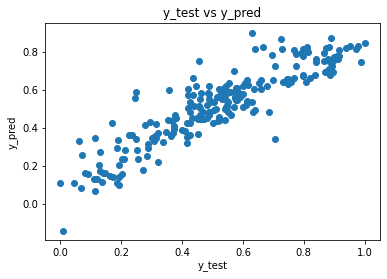

In [80]:
#Plotting on test set
plt.scatter(y_test,y_pred)
plt.title("y_test vs y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### R2 for test model

In [81]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8034948958049939

We can see the equation of the best fitted model

$ cnt = 0.234 \times yr + 0.448 \times temp + 0.043 \times Winter + 0.058 \times September - 0.098 \times holiday - 0.114 \times Spring - 0.287 \times Light Rain/Snow - 0.08 \times Mist - 0.07 \times July $